In [3]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print ('Python : {}'.format(sys.version))
print ('Numpy : {}'.format(numpy.__version__))
print ('Pandas : {}'.format(pandas.__version__))
print ('Matplotlib : {}'.format(matplotlib.__version__))
print ('Seaborn : {}'.format(seaborn.__version__))
print ('Scipy : {}'.format(scipy.__version__))
print ('Sklearn : {}'.format(sklearn.__version__))

Python : 3.7.3 (default, Mar 27 2019, 22:11:17) 
[GCC 7.3.0]
Numpy : 1.16.4
Pandas : 0.24.2
Matplotlib : 3.1.0
Seaborn : 0.9.0
Scipy : 1.3.0
Sklearn : 0.21.2


In [4]:
# Import the necessary packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [6]:
print (data.columns)
print (data.shape)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
(284807, 31)


In [7]:
print (data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [17]:
# 284807 data examples, we will use 10%
data = data.sample(frac = 0.15)
print (data.shape)

(4272, 31)


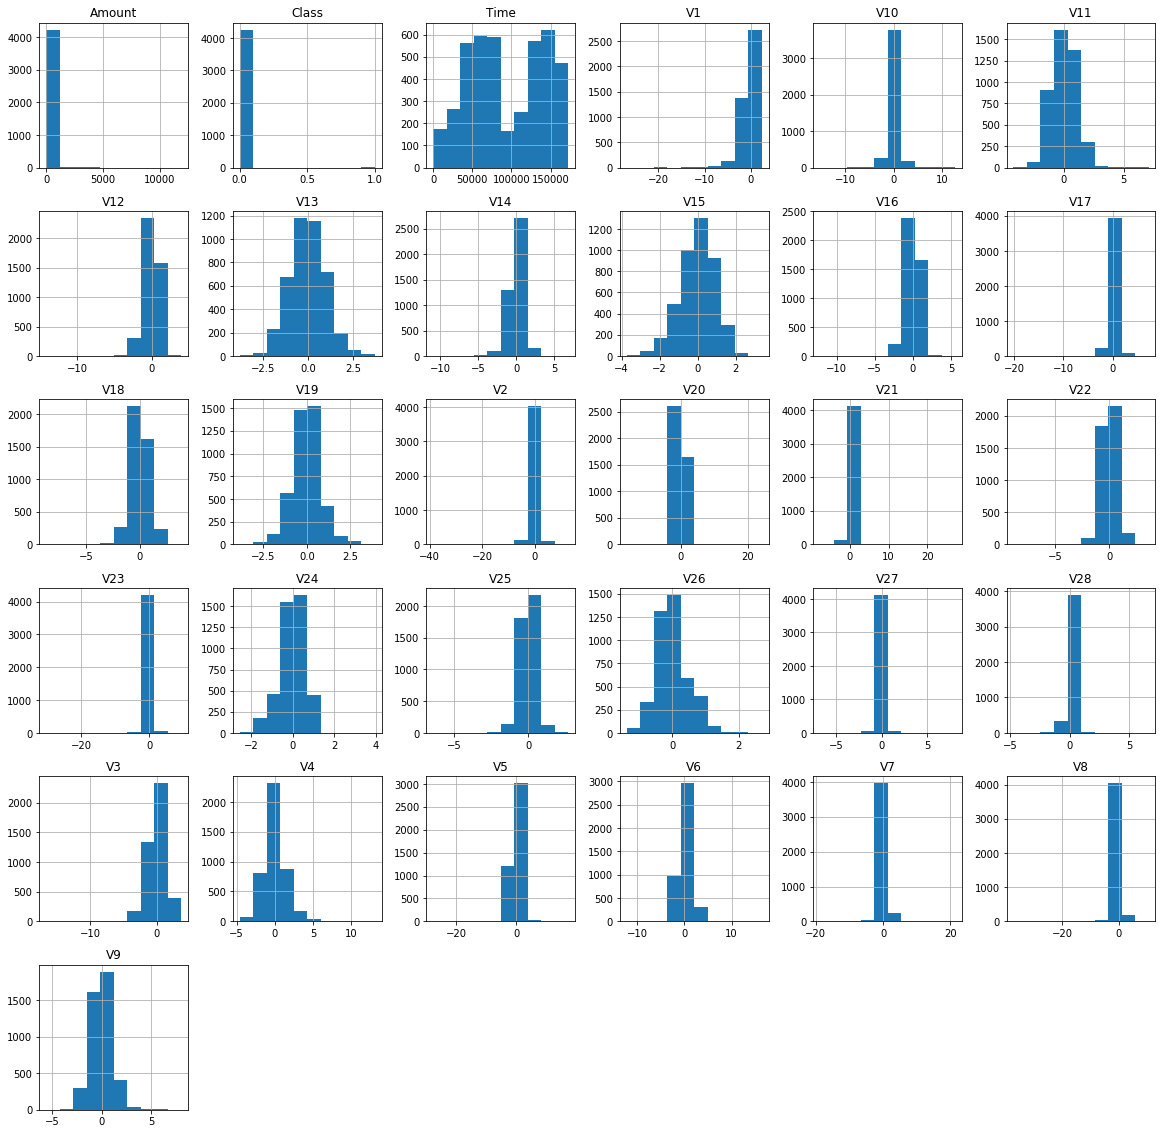

In [18]:
# plotting histogram
data.hist(figsize = (20,20))
plt.show()

In [19]:
# Determine the number of fraud examples which from histogram is very less
fraud = data[data['Class']==1]
valid = data[data['Class']==0]

print ('Valid transactions : {}'.format(len(valid)))
print ('Fraud transactions : {}'.format(len(fraud)))

outlier_fraction = len(fraud)/float(len(valid))
print ('Outlier fraction : {}'.format(outlier_fraction))

Valid transactions : 4266
Fraud transactions : 6
Outlier fraction : 0.0014064697609001407


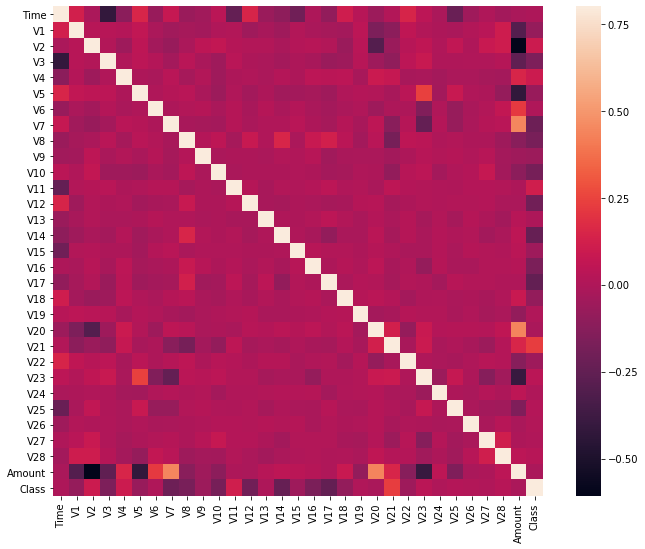

In [20]:
# Correlation Matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax=.8,square=True)
plt.show()

In [21]:
# Removing the column class from data
columns = data.columns.tolist()
columns = [c for c in columns if c not in ['Class']]

target = 'Class'

X = data[columns]
y = data[target]

print (X.shape)
print (y.shape)

(4272, 30)
(4272,)


In [22]:
# For Anamoly Detection we use IsolationForest and LocalOutlierFactor Algorithms
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

classifiers = {
    'Isolation Forest' : IsolationForest(max_samples=len(X),contamination=outlier_fraction),
    'Local Outlier Factor' : LocalOutlierFactor(n_neighbors=20,contamination=outlier_fraction)
}

In [24]:
# Fit the model
n_outliers = len(fraud)

for i,(clf_name,clf) in enumerate(classifiers.items()):
    
    if clf_name == 'Local Outlier Factor':
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # Reshaping the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != y).sum()
    
    # Run classification metrics
    print ('{}: {}'.format(clf_name,n_errors))
    print (accuracy_score(y,y_pred))
    print (classification_report(y,y_pred))
    

 # Precison and recall are very low suggesting many fraud cases were not detected.
 # Use better methods like neural networks

/home/shreyas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/shreyas/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Isolation Forest: 9
0.9978932584269663
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4266
           1       0.29      0.33      0.31         6

    accuracy                           1.00      4272
   macro avg       0.64      0.67      0.65      4272
weighted avg       1.00      1.00      1.00      4272

Local Outlier Factor: 13
0.9969569288389513
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4266
           1       0.00      0.00      0.00         6

    accuracy                           1.00      4272
   macro avg       0.50      0.50      0.50      4272
weighted avg       1.00      1.00      1.00      4272

